In this post, we're going to produce a couple of animations related to typical sound sources encountered in the study of acoustics: monopole, dipole and quadrupole sources (using `holoviews` with the `matplotlib` backend).

We start by creating an $(x, y)$ grid of space.

In [1]:
import numpy as np
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
x = np.linspace(-15, 15, num=100)
y = np.linspace(-15, 15, num=100)

X, Y = np.meshgrid(x, y)

Using this grid, we can build a phase map for a monopole source. By phase map, I mean the change in phase, at the selected frequency that a radial wave would incur by propagating from the origin to the point of the grid.

:QuadMesh   [x,y]   (z)
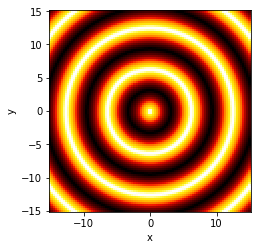

In [3]:
r = np.sqrt(X**2 + Y**2)
phase_map1= np.exp(1j * r)

hv.QuadMesh((X, Y, np.real(phase_map1)))

We can animate this phase map by adding a phase term that varies as a function of time. If we discretize a single period in a given number of frames and loop over the frames, we can generate an "infinite" animation. Let's try this!

In [4]:
N = 15

In [5]:
%%output holomap='scrubber'
hmap1 = hv.HoloMap({i: hv.QuadMesh((X, Y, np.real(phase_map1* np.exp(-1j * i / N * 2 * np.pi))), 
                                   label='monopole') for i in range(N)}).opts(colorbar=True)
hmap1

:HoloMap   [Default]
   :QuadMesh   [x,y]   (z)

Let's apply the same logic to a dipole, made out of two sources a fraction of a wavelength apart and out of phase.

In [6]:
delta = 2.5
r1 = np.sqrt((X-delta)**2 + Y**2)
r2 = np.sqrt((X+delta)**2 + Y**2)
phase_map2 = .5 * np.exp(1j * r1) - .5 * np.exp(1j * r2)

In [7]:
%%output holomap='scrubber' 
hmap2 = hv.HoloMap({i: hv.QuadMesh((X, Y, np.real(phase_map2 * np.exp(-1j * i / N * 2 * np.pi))), 
                                   label='dipole') for i in range(N)}).opts(colorbar=True)
hmap2

:HoloMap   [Default]
   :QuadMesh   [x,y]   (z)

Finally, the same formulas apply to a quadripole source, which is made out of four sources, two of them being out of phase.

In [8]:
gamma = 4.5
r1 = np.sqrt((X - gamma)**2 + (Y - gamma)**2)
r2 = np.sqrt((X - gamma)**2 + (Y + gamma)**2)
r3 = np.sqrt((X + gamma)**2 + (Y - gamma)**2)
r4 = np.sqrt((X + gamma)**2 + (Y + gamma)**2)
phase_map3 = .25 * np.exp(1j * r1) - .25 * np.exp(1j * r2) + .25 * np.exp(1j * r3) - .25 * np.exp(1j * r4)

In [9]:
%%output holomap='scrubber'
hmap3 = hv.HoloMap({i: hv.QuadMesh((X, Y, np.real(phase_map3 * np.exp(-1j * i / N * 2 * np.pi))), 
                                   label='quadrupole') for i in range(N)}).opts(colorbar=True)
hmap3

:HoloMap   [Default]
   :QuadMesh   [x,y]   (z)

As a final step, let's add a point cloud of particle moving on top of these monopole source. We first randomly create some points:

In [10]:
M = 400
Xm = x.min() + np.random.rand(M) * (x.max() - x.min())
Ym = y.min() + np.random.rand(M) * (y.max() - y.min())
Rm = np.sqrt(Xm**2 + Ym**2)
Tm = np.arctan2(Ym, Xm)

Build a phase map, using the same formula as before, but inserting the coordinates of the points.

In [11]:
points = np.c_[Rm * np.cos(Tm), Rm * np.sin(Tm)]
phase_map4 = 1j * np.exp(1j * 1 * Rm)

And then we animate it using an oscillation in time.

In [12]:
%%output holomap='scrubber'
hmap4 = hv.HoloMap({i: hv.Points(points + np.c_[np.real(phase_map4 * np.cos(Tm) * np.exp(-1j * i / N * 2 * np.pi)),
                                               np.real(phase_map4 * np.sin(Tm) * np.exp(-1j * i / N * 2 * np.pi))], 
                                                   label='points') for i in range(N)})
hmap4

:HoloMap   [Default]
   :Points   [x,y]

The structure of the wave is visualized thanks to the particle displacement.

Using the nice plotting API of `holoviews`, we can even overlay this animation with our previous monopole field animation:

In [13]:
%%output holomap='scrubber'
hmap1 * hmap4.opts(show_legend=False)

:HoloMap   [Default]
   :Overlay
      .QuadMesh.Monopole :QuadMesh   [x,y]   (z)
      .Points.Points     :Points   [x,y]

If you like this sort of animations, a fantastic resource for endless variations on the "wavy" theme can be found at [Bees and bombs](https://twitter.com/beesandbombs).

*This post was entirely written using the IPython notebook. Its content is BSD-licensed. You can see a static view or download this notebook with the help of nbviewer at [20190129_MonopoleDipoleQuadrupole.ipynb](http://nbviewer.ipython.org/urls/raw.github.com/flothesof/posts/master/20190129_MonopoleDipoleQuadrupole.ipynb).*